<a href="https://colab.research.google.com/github/gokimkq123/oss/blob/main/2243219.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __What's Data wearing__?

### first. I will use the famous __fasion images__ in keras' dataset.

### second. Building an __Image Classifier__ Using the __Sequential API__

### thirdly. I will use the model to __predict__ and __evaluate__ it.

by. 컴퓨터공학과 2학년 2243219 김건한

In [68]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [53]:
tf.__version__

'2.18.0'

In [54]:
keras.__version__

'3.8.0'

# Using Keras to Load the Dataset

In [55]:
from keras.datasets.fashion_mnist import load_data

(X_train_full, y_train_full), (X_test, y_test) = load_data();

[Reference Link] https://keras.io/api/datasets/fashion_mnist/

The dataset is already __split__ for you between a __training set and a test set__

In [56]:
print(X_train_full.shape, X_test.shape)
print(y_train_full.shape, y_test.shape)
print(X_train_full.dtype)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)
uint8


The training set contains __60,000 images__ and represents each image as __28 * 28 pixels__


In [57]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

| label |  Description |
|:----------|:----------:|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [58]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag','Ankle boot']

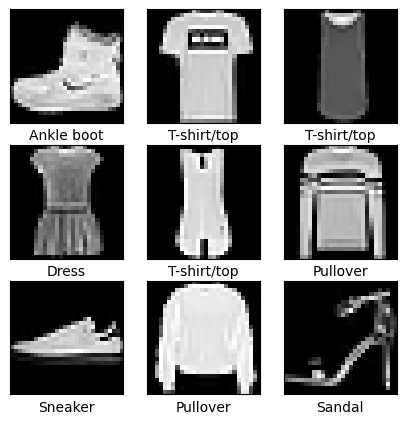

In [59]:
plt.figure(figsize=(5, 5))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train_full[i], cmap='gray')
  plt.xlabel(class_names[y_train_full[i]])

In [60]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

we are going to train the neural network using __Gradient Descent__ <br>
__scale__ the input features. <br>
For simplicity, we just scale the pixel intensities down to the __0-1 range by dividing them by 255.0__

# Creating the Model Using the Sequential API

In [61]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<img src = "https://www.oreilly.com/api/v2/epubs/9781492037354/files/assets/mlst_1009.png" width="600">

[https://www.oreilly.com/library/view/neural-networks-and/9781492037354/ch01.html]


we add a Dense output layer with 10 neurons (one per class), using the
softmax activation function (because the __classes are exclusive__).

In [62]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [63]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model

In [64]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

### loss: __sparse_categorical_crossentropy__
The reason for using the cross-entropy loss function is that it is very effective in evaluating and optimizing the performance of the model in classification problems.
and
__Good fit with Gradient Descent:__
### optimizer : __SGD__ ,
Keras will perform the backpropagation algorithm described earlier (i.e., __reverse-mode autodiff + Gradient Descent__).

# Training and Evaluating the Model

In [67]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9202 - loss: 0.2232 - val_accuracy: 0.8918 - val_loss: 0.2933
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9226 - loss: 0.2204 - val_accuracy: 0.8868 - val_loss: 0.3029
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9227 - loss: 0.2181 - val_accuracy: 0.8938 - val_loss: 0.2904
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9232 - loss: 0.2135 - val_accuracy: 0.8884 - val_loss: 0.2990
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9249 - loss: 0.2104 - val_accuracy: 0.8924 - val_loss: 0.2956
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9271 - loss: 0.2043 - val_accuracy: 0.8914 - val_loss: 0.2961
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9270 - loss: 0.2052 - val_accuracy: 0.8870 - val_loss: 0.3121
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9279 - loss: 0.2023

In [69]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [70]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

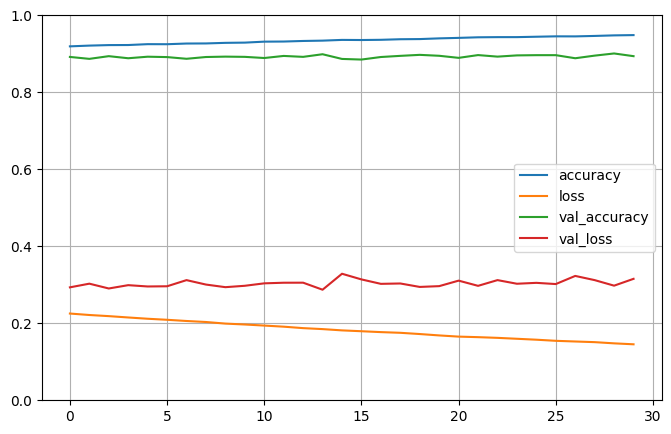

In [72]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

You can see that both the training and validation __accuracy steadily increase__ during training, while the training and validation __loss decrease.__

the valida-tion curves are quite close to the training curves, which means that there is __not too much overfitting__.

In [106]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8871 - loss: 0.3432


[0.3448391258716583, 0.8835999965667725]

### It has an accuracy of about __88%__.

# Using the Model to Make Predictions

In [119]:
X_new = X_test[:3]
y_ans = y_test[:3]

y_ans

array([9, 2, 1], dtype=uint8)

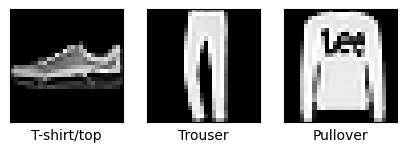

In [123]:
plt.figure(figsize=(5, 5))
for i in range(3):
  plt.subplot(3, 3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[y_ans[i]], cmap='gray')
  plt.xlabel(class_names[i])

we will just use the first 3 instances of the test set:

In [126]:
y_prediction = np.argmax(model.predict(X_new), axis=-1)
y_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


array([9, 2, 1])

In [120]:
y_ans == y_prediction

array([ True,  True,  True])

The value predicted using X_new is __the same as the y_ans value__!

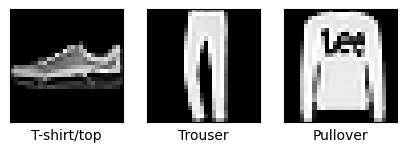

In [125]:
plt.figure(figsize=(5, 5))
for i in range(3):
  plt.subplot(3, 3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_test[y_prediction[i]], cmap='gray')
  plt.xlabel(class_names[i])